In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tushare as ts
warnings.filterwarnings("ignore")

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [13]:
path = 'E:/Project/Quantitative/data/result.csv'
data = pd.read_csv(path, encoding = "gb2312")
data.head()

,股票代号,策略后本金,收益率,胜场,负场
0,600519,217451.24,117.451245,25,19
1,858,366381.79,266.381793,24,20
2,300059,168543.13,68.543126,18,24
3,300760,180879.15,80.879149,25,18
4,1,222368.59,122.368590,24,21


In [14]:
data

,股票代号,策略后本金,收益率,胜场,负场
0,600519,217451.24,117.451245,25,19
1,858,366381.79,266.381793,24,20
2,300059,168543.13,68.543126,18,24
3,300760,180879.15,80.879149,25,18
4,1,222368.59,122.368590,24,21
...,...,...,...,...,...
4036,605099,100000.00,0.000000,0,0
4037,688093,102517.99,2.517986,1,0
4038,3011,103041.04,3.041045,1,0
4039,605338,100000.00,0.000000,0,0


In [15]:
data[data['收益率'] > 400]

,股票代号,策略后本金,收益率,胜场,负场
142,300598,662628.11,562.628112,24,22
188,300085,524232.87,424.232870,20,23
340,603005,665988.90,565.988903,18,21
661,300573,565766.48,465.766478,17,24
683,603976,529788.78,429.788784,18,20
708,2791,639415.49,539.415488,19,15
854,2481,531437.55,431.437545,20,23
975,300638,501562.32,401.562316,22,17
1127,603129,585325.26,485.325262,22,13
1181,601519,540038.54,440.038543,15,30


In [16]:
def income_range(data):
    for tup in data.itertuples():
        index = tup[0]
        rate = tup[3]
        if rate < -100:
            data.loc[index, '收益幅度'] = '负100+'
        elif -100 <= rate < -80:
            data.loc[index, '收益幅度'] = '负80+'
        elif -80 <= rate < -60:
            data.loc[index, '收益幅度'] = '负60+'
        elif -60 <= rate < -40:
            data.loc[index, '收益幅度'] = '负40+'
        elif -40 <= rate < -20:
            data.loc[index, '收益幅度'] = '负20+'
        elif -20 <= rate < 0:
            data.loc[index, '收益幅度'] = '负20-'
        elif 0 <= rate < 20:
            data.loc[index, '收益幅度'] = '正20-'
        elif 20 <= rate < 40:
            data.loc[index, '收益幅度'] = '正20+'
        elif 40 <= rate < 60:
            data.loc[index, '收益幅度'] = '正40+'
        elif 60 <= rate < 80:
            data.loc[index, '收益幅度'] = '正60+'
        elif 80 <= rate < 100:
            data.loc[index, '收益幅度'] = '正80+'
        elif 100 <= rate < 200:
            data.loc[index, '收益幅度'] = '正100+'
        elif 200 <= rate < 300:
            data.loc[index, '收益幅度'] = '正200+'
        elif 300 <= rate < 400:
            data.loc[index, '收益幅度'] = '正300+'
        elif 400 <= rate < 500:
            data.loc[index, '收益幅度'] = '正400+'
        elif 500 <= rate:
            data.loc[index, '收益幅度'] = '正500+'

In [17]:
income_range(data)
data.head()

,股票代号,策略后本金,收益率,胜场,负场,收益幅度
0,600519,217451.24,117.451245,25,19,正100+
1,858,366381.79,266.381793,24,20,正200+
2,300059,168543.13,68.543126,18,24,正60+
3,300760,180879.15,80.879149,25,18,正80+
4,1,222368.59,122.368590,24,21,正100+


In [18]:
count = data['收益幅度'].value_counts()

In [19]:
count.head()

负20-    874
正20-    773
正20+    558
负20+    470
正40+    375
Name: 收益幅度, dtype: int64

In [20]:
dict_count = {'收益幅度':count.index,'出现数量':count.values}
df_count = pd.DataFrame(dict_count)

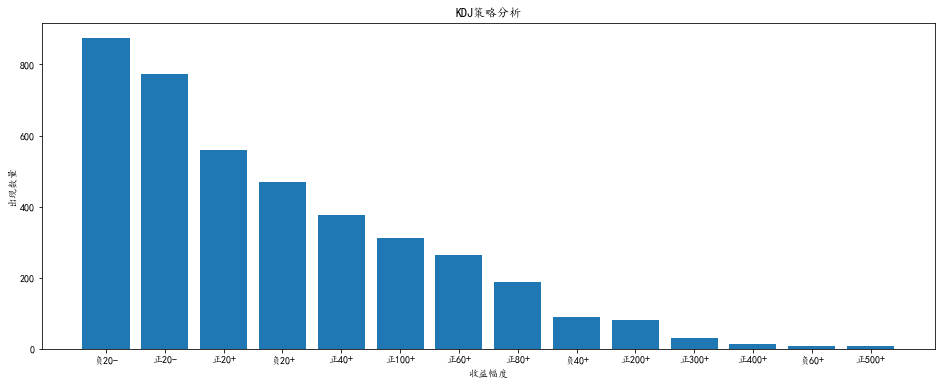

In [21]:
plt.figure(figsize=(16, 6))
plt.bar(df_count['收益幅度'], height= df_count['出现数量'], width=0.8)
plt.title('KDJ策略分析')
plt.xlabel('收益幅度')
plt.ylabel('出现数量')
plt.show()